# __Neural Networks in Scikit-Learn and NumPy (Part A)__

_Note: Scikit-Learn is not intended for use in large-scale Deep Learning projects._ <br>
It does, however, offer the required functionality to build simple DL models, such as the Multi-layer Perceptron (MLP), which we will use here.
We take this a step further with NumPy, in which more control over the architecture of the neural network is available, and training can become more complex.

General imports

In [1]:
%matplotlib inline  
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

Generate some tricky data!

In [2]:
X, y = make_moons(n_samples = 500, noise = 0.2, random_state = 101)

Split the data into training and test sets

In [3]:
# insert code here to split the data into 80:20 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

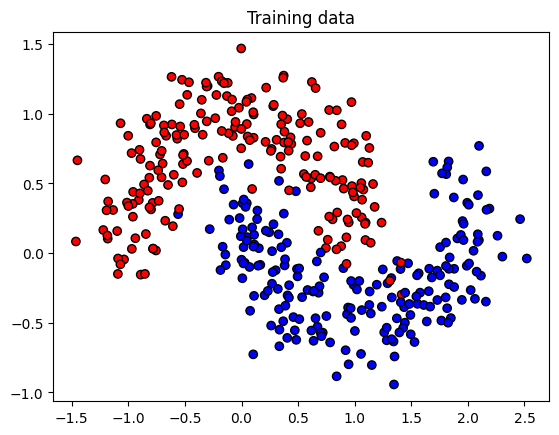

In [4]:
# visualise the training data
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train, edgecolors='k', cmap = cm_bright)
plt.title('Training data')
plt.show()

We will now attempt to build a neural network classifier that can accurately predict the classes data in this dataset.

Import the sklearn Classifier based on the MLP algorithm

In [5]:
from sklearn.neural_network import MLPClassifier

We now want to train a neural network model, to classify red and blue points based on their coordinates, with the MLPClassifier.

A lot of the setup of the neural network is taken care of for us, and some of them are fixed:
- there if no activation function for the output layer
- cross-entropy is used as the loss function
- we cannot use different activation functions or weight initialisers for different layers

In [6]:
alpha = 1e-5
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

Now check the score (the mean accuracy of `self.predict(X)`).

In [7]:
clf.score(X_test,y_test)

0.99

In [8]:
# insert code (one line) to predict the classes for the test set.
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [9]:
# insert code (one line) to list the classification probabilities for the test set.
clf.predict_proba(X_test)

array([[1.00000000e+00, 1.71363755e-18],
       [1.00000000e+00, 3.35644095e-28],
       [7.02960814e-05, 9.99929704e-01],
       [9.94729039e-01, 5.27096060e-03],
       [1.00000000e+00, 9.81136829e-40],
       [9.99931274e-01, 6.87261653e-05],
       [9.99956973e-01, 4.30272654e-05],
       [1.00000000e+00, 2.24428904e-30],
       [9.70322178e-01, 2.96778217e-02],
       [9.99656273e-01, 3.43726989e-04],
       [9.99803308e-01, 1.96691570e-04],
       [1.00000000e+00, 3.99667107e-39],
       [1.00000000e+00, 4.20771496e-25],
       [1.58196489e-02, 9.84180351e-01],
       [8.12464128e-01, 1.87535872e-01],
       [9.97972032e-01, 2.02796760e-03],
       [9.76922373e-01, 2.30776274e-02],
       [9.99999468e-01, 5.32313544e-07],
       [9.40962909e-04, 9.99059037e-01],
       [9.47471769e-04, 9.99052528e-01],
       [1.00000000e+00, 9.45683983e-36],
       [9.21481158e-04, 9.99078519e-01],
       [9.99663542e-01, 3.36458423e-04],
       [1.33398884e-06, 9.99998666e-01],
       [9.998957

__Have a play:__
- How does adjusting `alpha`, affect the score?
- How does changing `hidden_layer_sizes` affect the score, or the training time? Note: we can use hidden layers as the total number of layer minus 2 (the input and output layers). `hidden_layer_sizes=(5, 2)` means there will be two hidden layers, the first with 5 units and the second with 2 units. Try one to three layers with 1 to 10 units per layer. Look at the effects this has. Also look out for convergence warnings as the number of parameters increases.

__Visualise model boundaries__ _Note: this is not a prediction, but shows how the feature space is divided into classes._

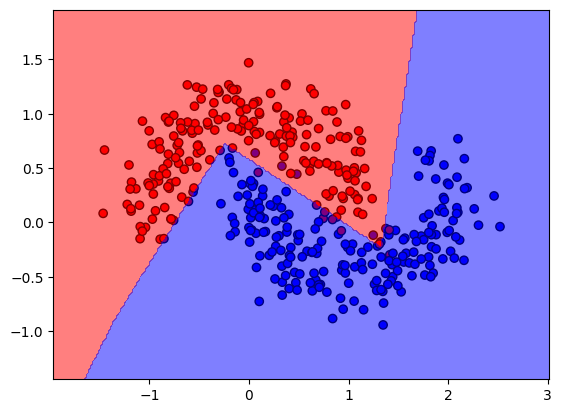

In [10]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train.ravel(), edgecolors='k', cmap = cm_bright)
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = 0.02 # step in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_binary = Z>=0.5
Z_binary = Z_binary.reshape(xx.shape)
ax.contourf(xx, yy, Z_binary, cmap=cm_bright, alpha=.5)
plt.show()

__Confusion Matrices__

In [11]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(clf.predict(X_test), y_test)
cm

array([[51,  1],
       [ 0, 48]])

Use a `seaborn` heatmap to visualise the confusion matrix.

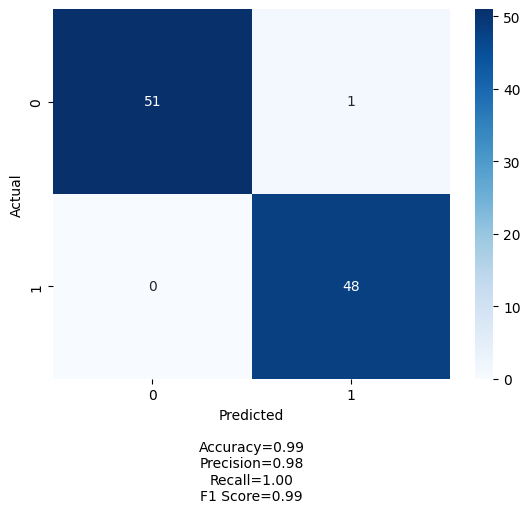

In [12]:
import seaborn as sn
# Insert code to calculate the accuracy, precision, recall and F1 score of the model.
# For these, you could import helpful functions from sklearn.metrics, or write them yourself.
accuracy  = np.trace(cm) / float(np.sum(cm))
precision = cm[1,1] / sum(cm[:,1])
recall    = cm[1,1] / sum(cm[1,:])
f1_score  = 2*precision*recall / (precision + recall)
stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted' + stats_text)
plt.show()

__Move to Practical8b.ipynb__